## <b> Data Cleaning </b>

In [3]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import matplotlib.dates as mdates
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)

# importing necesary packages
import numpy as np
import pandas as pd
import pickle
import itertools
import timeit
from scipy import stats

# graphing libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.pylab import rcParams
from shapely.wkt import loads
import geopandas as gpd

# modeling libraries
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
# ignore warnings
from warnings import filterwarnings
filterwarnings('ignore')

## Load Data

In [4]:
# Open the file in read-binary ('rb') mode
file_path = 'crime_data_for_model.pkl'
with open(file_path, 'rb') as file:
    # Load the data from the file into a variable
    df = pickle.load(file)

# Ensure that the loaded data is a DataFrame
if isinstance(df, pd.DataFrame):
    # df is a pandas DataFrame
    print(df.head())
else:
    raise TypeError("Loaded data is not a pandas DataFrame.")

   Sector    Month  Violent Crimes  SAFETY  S_EDUCATION_LOW  \
0     110  2017-11              66   68.23              NaN   
1     110  2017-12              52   65.67              NaN   
2     110  2018-01              74   72.35              NaN   
3     110  2018-02              73   75.66              NaN   
4     110  2018-03              84   73.90            62.18   

   S_EDUCATION_MEDIUM  S_EDUCATION_HIGH  S_INCOME_LOW  S_INCOME_MEDIUM  \
0                 NaN               NaN           NaN              NaN   
1                 NaN               NaN           NaN              NaN   
2                 NaN               NaN           NaN              NaN   
3                 NaN               NaN           NaN              NaN   
4               78.27              74.8         65.28             78.7   

   S_INCOME_HIGH  TRUST  T_EDUCATION_LOW  T_EDUCATION_MEDIUM  \
0            NaN  65.02              NaN                 NaN   
1            NaN  64.76              NaN        

In [5]:
df.head()

,Sector,Month,Violent Crimes,SAFETY,S_EDUCATION_LOW,S_EDUCATION_MEDIUM,S_EDUCATION_HIGH,S_INCOME_LOW,S_INCOME_MEDIUM,S_INCOME_HIGH,TRUST,T_EDUCATION_LOW,T_EDUCATION_MEDIUM,T_EDUCATION_HIGH,T_INCOME_LOW,T_INCOME_MEDIUM,T_INCOME_HIGH,TOTAL POPULATION,Population Density (people/sqkm),Violent Crimes per Capita,Units,Units per SqKm,Units per Capita,PERCENT_OF_HOUSING_CROWDED,PERCENT_HOUSEHOLDS_BELOW_POVERTY,PERCENT_AGED_16_UNEMPLOYED,PERCENT_AGED_25_WITHOUT_HIGH_SCHOOL_DIPLOMA,PERCENT_AGED_UNDER_18_OR_OVER_64,PER_CAPITA_INCOME,HARDSHIP_INDEX
0,110,2017-11,66,68.23,NaN,NaN,NaN,NaN,NaN,NaN,65.02,NaN,NaN,NaN,NaN,NaN,NaN,18369,4114.98123,3.593010,511.0,114.473047,0.027819,1.5,14.7,5.7,3.1,13.5,65526.0,3.0
1,110,2017-12,52,65.67,NaN,NaN,NaN,NaN,NaN,NaN,64.76,NaN,NaN,NaN,NaN,NaN,NaN,18369,4114.98123,2.830856,511.0,114.473047,0.027819,1.5,14.7,5.7,3.1,13.5,65526.0,3.0
2,110,2018-01,74,72.35,NaN,NaN,NaN,NaN,NaN,NaN,68.09,NaN,NaN,NaN,NaN,NaN,NaN,18369,4114.98123,4.028526,511.0,114.473047,0.027819,1.5,14.7,5.7,3.1,13.5,65526.0,3.0
3,110,2018-02,73,75.66,NaN,NaN,NaN,NaN,NaN,NaN,70.62,NaN,NaN,NaN,NaN,NaN,NaN,18369,4114.98123,3.974087,511.0,114.473047,0.027819,1.5,14.7,5.7,3.1,13.5,65526.0,3.0
4,110,2018-03,84,73.90,62.18,78.27,74.8,65.28,78.7,73.23,70.81,59.96,71.98,73.84,56.56,74.95,76.14,18369,4114.98123,4.572922,511.0,114.473047,0.027819,1.5,14.7,5.7,3.1,13.5,65526.0,3.0


In [6]:
df.shape

(4891, 30)

<font size = "4"> Review and Clean Data (2001 - 2023) </font>

In [7]:
#Initial dataset shape
print('Dataset Shape:', df.shape)
df.info()

Dataset Shape: (4891, 30)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4891 entries, 0 to 4890
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Sector                                       4891 non-null   int64  
 1   Month                                        4891 non-null   object 
 2   Violent Crimes                               4891 non-null   int64  
 3   SAFETY                                       4891 non-null   float64
 4   S_EDUCATION_LOW                              4623 non-null   float64
 5   S_EDUCATION_MEDIUM                           4623 non-null   float64
 6   S_EDUCATION_HIGH                             4623 non-null   float64
 7   S_INCOME_LOW                                 4623 non-null   float64
 8   S_INCOME_MEDIUM                              4623 non-null   float64
 9   S_INCOME_HIGH                                462

In [8]:
# Get descriptive statistics
summary_stats = df.describe()
summary_stats

,Sector,Violent Crimes,SAFETY,S_EDUCATION_LOW,S_EDUCATION_MEDIUM,S_EDUCATION_HIGH,S_INCOME_LOW,S_INCOME_MEDIUM,S_INCOME_HIGH,TRUST,T_EDUCATION_LOW,T_EDUCATION_MEDIUM,T_EDUCATION_HIGH,T_INCOME_LOW,T_INCOME_MEDIUM,T_INCOME_HIGH,TOTAL POPULATION,Population Density (people/sqkm),Violent Crimes per Capita,Units,Units per SqKm,Units per Capita,PERCENT_OF_HOUSING_CROWDED,PERCENT_HOUSEHOLDS_BELOW_POVERTY,PERCENT_AGED_16_UNEMPLOYED,PERCENT_AGED_25_WITHOUT_HIGH_SCHOOL_DIPLOMA,PERCENT_AGED_UNDER_18_OR_OVER_64,PER_CAPITA_INCOME,HARDSHIP_INDEX
count,4891.000000,4891.000000,4891.000000,4623.000000,4623.000000,4623.000000,4623.000000,4623.000000,4623.000000,4891.000000,4623.000000,4623.000000,4623.000000,4623.000000,4623.000000,4623.000000,4891.000000,4891.000000,4891.000000,4891.000000,4891.000000,4891.000000,4891.000000,4891.000000,4891.000000,4891.000000,4891.000000,4891.000000,4891.000000
mean,1244.328358,81.450624,58.036735,55.585228,57.892321,62.213991,56.315075,58.322440,62.170045,59.847851,59.366096,59.568326,64.629981,56.857270,59.803764,67.137960,44441.925373,3559.441727,115.889827,31046.791045,2975.325197,0.853371,4.677612,22.304478,15.319403,18.037313,33.713433,28572.925373,45.686567
std,710.439834,37.077261,7.965700,10.217672,9.138258,9.700034,10.051531,9.330064,10.065889,9.389374,11.258463,10.996305,10.962454,10.899418,11.069542,10.139216,19966.006252,1789.573150,971.353083,39531.647315,4137.465457,1.272395,3.253061,10.359593,8.082429,10.424430,8.192112,18249.921179,29.888513
min,110.000000,3.000000,28.360000,8.620000,24.190000,19.770000,16.880000,22.570000,22.140000,30.540000,11.050000,20.960000,24.290000,17.000000,23.850000,29.730000,2.000000,0.039635,0.143640,0.000000,0.000000,0.000000,0.800000,3.400000,4.700000,2.500000,13.500000,8201.000000,1.000000
25%,620.000000,53.000000,52.490000,48.935000,51.680000,56.180000,49.615000,51.985000,55.795000,53.160000,51.415000,52.170000,57.525000,49.360000,52.165000,60.500000,27996.000000,2560.724526,1.004722,5986.000000,337.928978,0.131912,2.300000,13.200000,8.700000,10.900000,26.200000,15528.000000,17.000000
50%,1210.000000,78.000000,58.400000,56.110000,58.460000,62.770000,56.630000,59.080000,63.000000,59.780000,59.210000,59.710000,65.030000,56.710000,59.890000,67.460000,38768.000000,3389.292082,1.889038,19126.000000,1322.166596,0.373137,3.800000,20.600000,14.600000,16.500000,37.300000,23791.000000,41.000000
75%,1820.000000,106.000000,63.800000,62.720000,64.665000,69.150000,63.385000,65.050000,69.150000,66.175000,67.275000,67.085000,72.310000,64.245000,67.380000,74.140000,57429.000000,4176.169738,3.381815,36719.000000,3568.755700,1.079150,6.300000,29.200000,21.200000,24.400000,40.500000,35911.000000,73.000000
max,2530.000000,223.000000,80.330000,86.890000,84.750000,95.570000,88.440000,85.430000,90.840000,88.100000,96.310000,92.000000,93.920000,91.460000,94.520000,93.150000,90900.000000,10061.458640,14500.000000,249149.000000,20063.859360,7.842273,15.200000,56.500000,35.900000,54.800000,51.500000,88669.000000,98.000000


## Number of Violent Crimes Breakout

Let's see the number of Violent Crimes per  Year, Month, and Year/Months

### Data/Time Columns

In [9]:
#Rename Month column to Date
df.rename(columns={'Month': 'Date'}, inplace=True)
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Create Year and Month columns from Date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

## Pearson Coorelation

# Example: Pearson correlation
correlation_coefficient, p_value = stats.pearsonr(df['variable1'], df['variable2'])

<Figure size 1200x600 with 0 Axes>

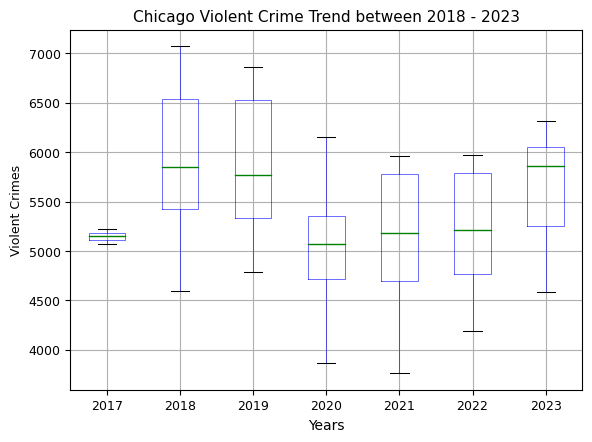

In [10]:
# Combine 'Year' and 'Month' into a new column 'Date' with flexible parsing
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str), errors='coerce')

# Remove rows with NaT (Not-a-Time) values, which may have resulted from parsing errors
df.dropna(subset=['Date'], inplace=True)

# Grouping the data by 'Date' and summing up the violent crimes
monthly_crime = df.groupby('Date').agg({'Violent Crimes':'sum'}).reset_index()#Assuming monthly_crime is already defined and includes a 'Violent Crimes' column and 'Date' column in datetime format
monthly_crime['Date'] = pd.to_datetime(monthly_crime['Date'])

# Extract year from 'Date' and assign it as a new column 'Year'
monthly_crime['Year'] = monthly_crime['Date'].dt.year

# Create the boxplot using pandas' built-in functionality
plt.figure(figsize=(12, 6))
boxprops = dict(linestyle='-', linewidth=.4, color='blue')
whiskerprops = dict(linestyle='-', linewidth=.4, color='blue')
capprops = dict(linestyle='-', linewidth=.75, color='black')
medianprops = dict(linestyle='-', linewidth=1, color='green')

bp = monthly_crime.boxplot(
    column='Violent Crimes', 
    by='Year', 
    boxprops=boxprops, 
    whiskerprops=whiskerprops,
    capprops=capprops,
    medianprops=medianprops,
    showfliers=True,  # Ensure that outliers are shown
    #showcaps=True,  # Shows the caps on the ends of whiskers
    return_type='dict',  # Ensures the method returns a dictionary of matplotlib.lines.Line2D objects
)

# Set the title and labels with smaller font sizes
plt.title('Chicago Violent Crime Trend between 2018 - 2023', size=11)
plt.suptitle('')  # Removes the default title

# Set the font size for x and y axis labels
plt.xlabel('Years', fontsize=10)
plt.ylabel('Violent Crimes', fontsize=9)

# Set smaller tick labels
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()

### Time Series Data Analysis

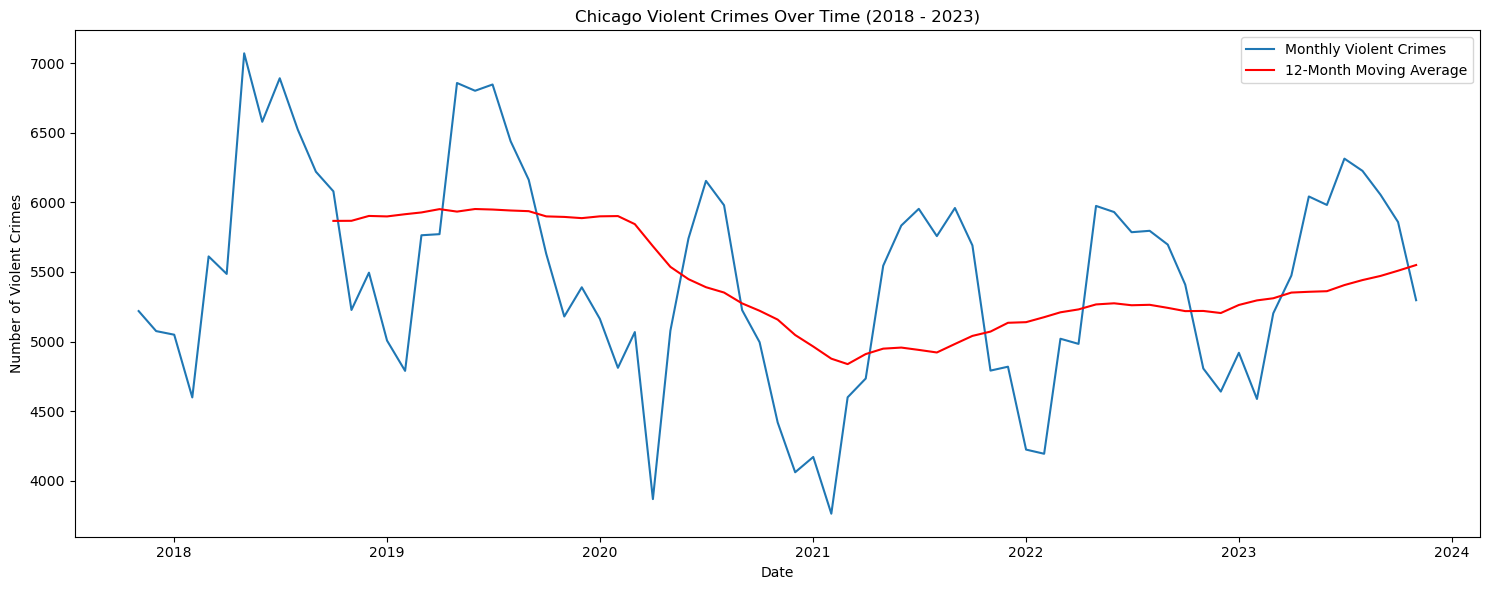

In [11]:
# Combine 'Year' and 'Month' into a new column 'Date' with flexible parsing
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str), errors='coerce')

# Remove rows with NaT (Not-a-Time) values, which may have resulted from parsing errors
df.dropna(subset=['Date'], inplace=True)

# Group the data by 'Date' and summing up the violent crimes
monthly_crime = df.groupby('Date').agg({'Violent Crimes':'sum'}).reset_index()

# Calculate the moving average for violent crimes with a window of 12 months
monthly_crime['Moving Average'] = monthly_crime['Violent Crimes'].rolling(window=12).mean()

# Plot the time series and moving averages
plt.figure(figsize=(15, 6))
plt.plot(monthly_crime['Date'], monthly_crime['Violent Crimes'], label='Monthly Violent Crimes')
plt.plot(monthly_crime['Date'], monthly_crime['Moving Average'], label='12-Month Moving Average', color='red')
plt.title('Chicago Violent Crimes Over Time (2018 - 2023)')
plt.xlabel('Date')
plt.ylabel('Number of Violent Crimes')
plt.legend()
plt.tight_layout()
plt.show()

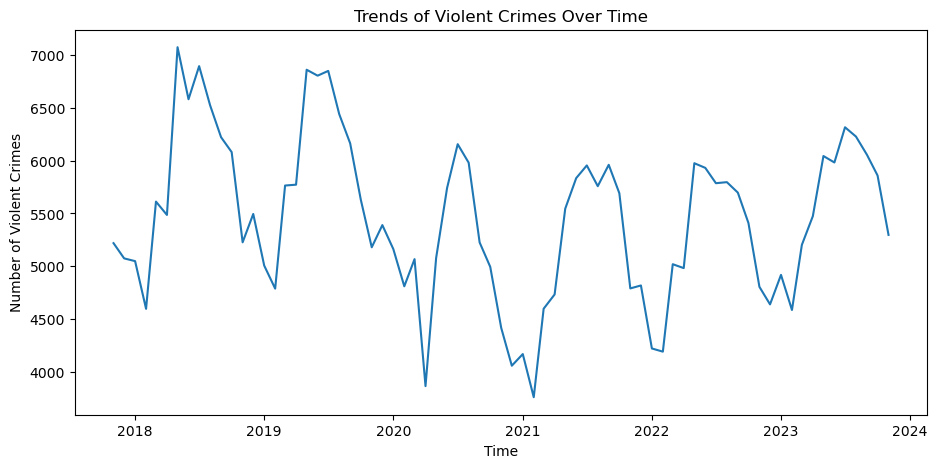

In [12]:
# Convert 'Month' to datetime format for proper plotting
df['Date'] = pd.to_datetime(df['Date'])

# Group by Month and sum the violent crimes
monthly_crime_data = df.groupby('Date')['Violent Crimes'].sum().reset_index()#

# Plotting
plt.figure(figsize=(11,5))
plt.plot(monthly_crime_data['Date'], monthly_crime_data['Violent Crimes'])
         #, marker='o', linestyle='-')
plt.title('Trends of Violent Crimes Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Violent Crimes')
#plt.grid(True)

# Formatting the date on x-axis for better readability
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=12))
plt.show()

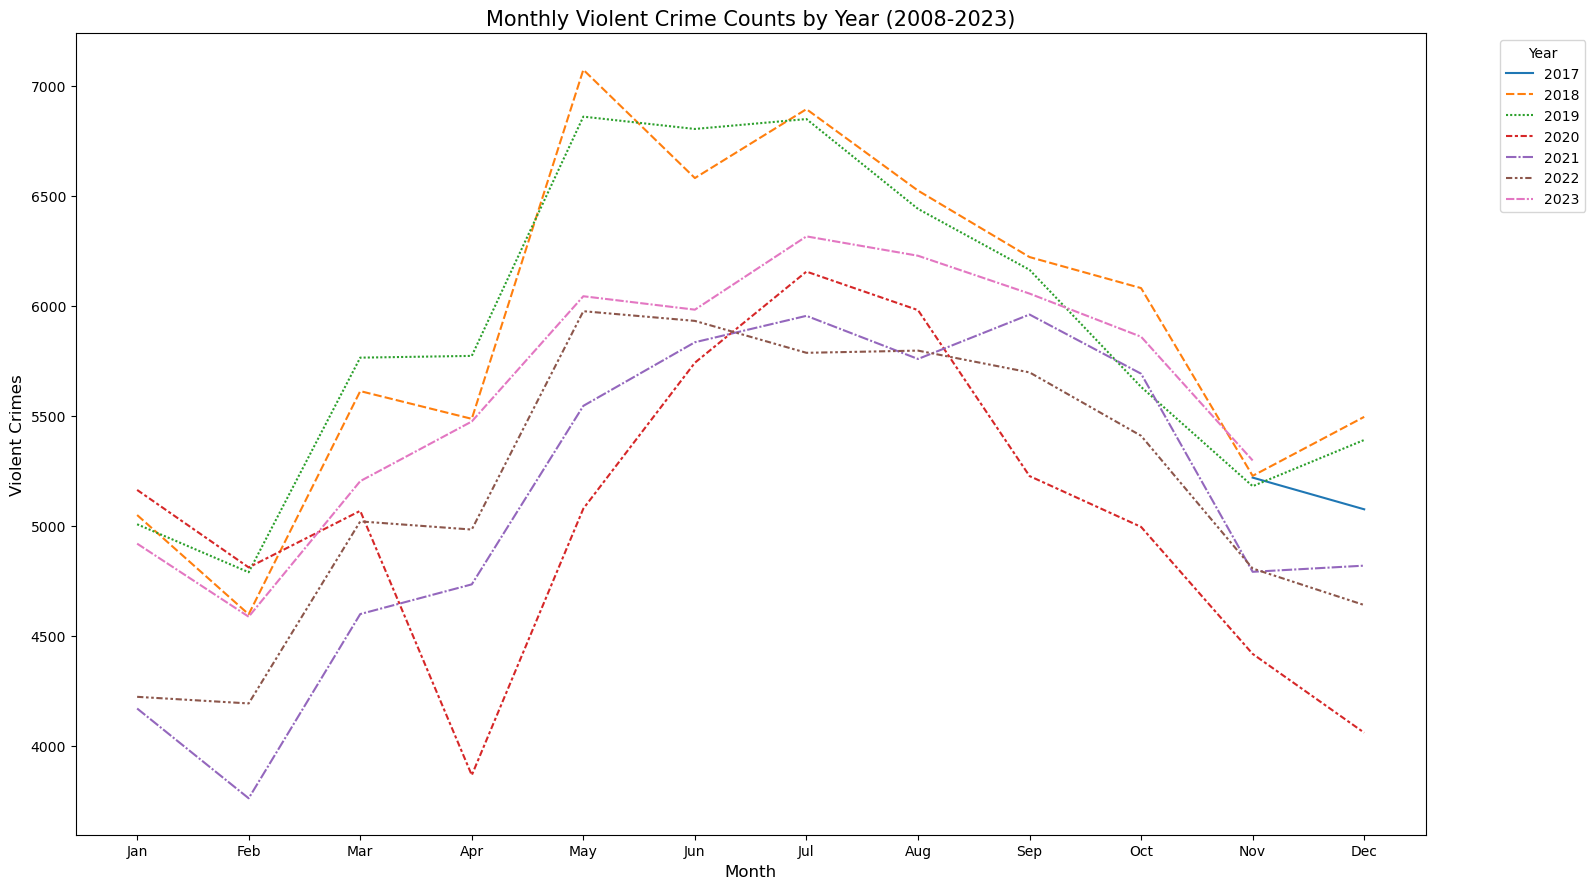

In [13]:
df_copy = df.copy()

# Convert 'Date' to datetime if it's not already
df_copy['Date'] = pd.to_datetime(df_copy['Date'])

# Ensure you are creating 'Year' and 'Month' columns correctly
df_copy['Year'] = df_copy['Date'].dt.year
df_copy['Month'] = df_copy['Date'].dt.month

# Assuming 'Violent Crimes' is a column in df_copy, we'll aggregate it by year and month
# Make sure to aggregate on df_copy, especially if 'Violent Crimes' is a column you're analyzing
monthly_crime = df_copy.groupby(['Year', 'Month']).agg({'Violent Crimes':'sum'}).reset_index()

# Now, you have 'Year', 'Month', and 'Violent Crimes' correctly aggregated in monthly_crime

# Filter data for the years 2008 to 2023
filtered_monthly_crime = monthly_crime[(monthly_crime['Year'] >= 2008) & (monthly_crime['Year'] <= 2023)]

# Pivot the data for plotting
pivot_table = filtered_monthly_crime.pivot(index='Month', columns='Year', values='Violent Crimes')

# Plotting
plt.figure(figsize=(16, 9))
sns.lineplot(data=pivot_table)

plt.title('Monthly Violent Crime Counts by Year (2008-2023)', size=15)
plt.xlabel('Month', size=12)
plt.ylabel('Violent Crimes', size=12)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Ensure month labels are correct

plt.tight_layout()
plt.show()


### Crime Distribution by Sector

In [14]:
# Create a copy of df
df_copy = df.copy()

# Aggregate violent crimes by sector
crime_by_sector = df_copy.groupby('Sector')['Violent Crimes'].sum().reset_index()

# Reload police sector geographical data (had to rejoin, for some reason violent crime counts didn't aggregate correctly and were very low)
police_sector_geom_path = 'police_sector_geom.csv'
police_sector_geom = pd.read_csv(police_sector_geom_path)

# Convert the geometry column from WKT to a geometry object
police_sector_geom['geometry'] = police_sector_geom['geometry'].apply(loads)
gdf_sectors = gpd.GeoDataFrame(police_sector_geom, geometry='geometry')

# Merge the aggregated crime data with the geographical data
gdf_sectors = gdf_sectors.merge(crime_by_sector, left_on='SECTOR', right_on='Sector', how='left')

FileNotFoundError: [Errno 2] No such file or directory: 'police_sector_geom.csv'

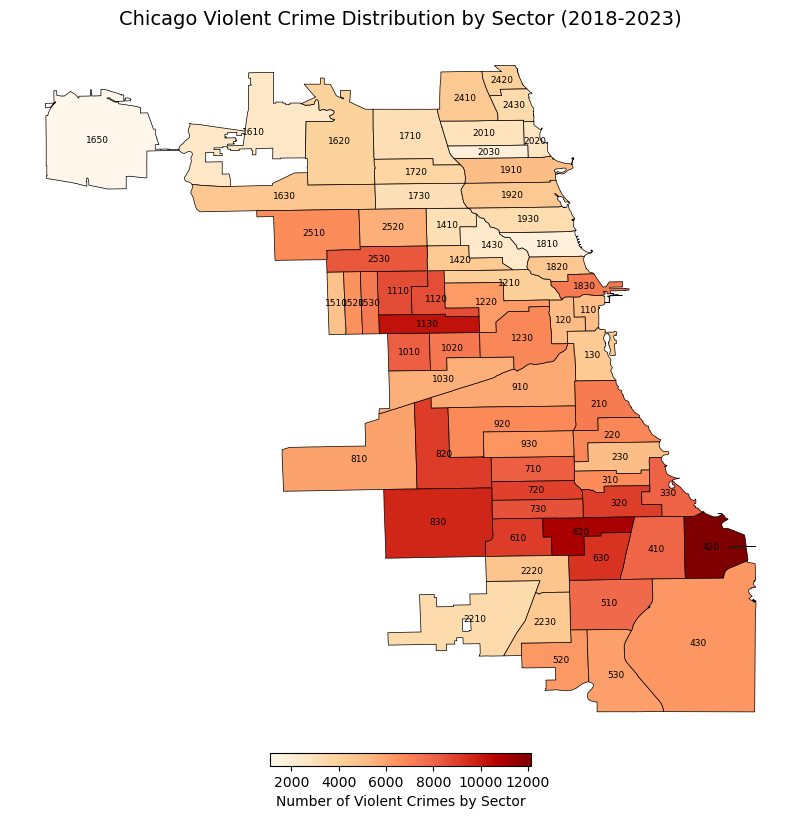

In [ ]:
#Create the density heatmap for violent crimes by sector
fig, ax_main = plt.subplots(1, 1, figsize=(9, 9))
gdf_sectors.plot(column='Violent Crimes', ax=ax_main, legend=True,
                         legend_kwds={'label': "Number of Violent Crimes by Sector",
                                      'orientation': "horizontal", 'shrink': 0.3, 'pad': 0.01},
                         cmap='OrRd', edgecolor='black', linewidth=0.5) 

# Add sector numbers with adjusted font size and position
for idx, row in gdf_sectors.iterrows():
    plt.annotate(text=row['SECTOR'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', verticalalignment='center', fontsize=6.5, color='black')

# Remove axis for main map
ax_main.set_axis_off()
ax_main.set_title("Chicago Violent Crime Distribution by Sector (2018-2023)", fontsize=14)
# Tight layout to minimize white space
plt.tight_layout()
plt.show()

## Statistical Testing

### Seasonal Decomposition Analysis

In [ ]:
# Group by Month and sum the violent crimes
monthly_crime_data.set_index('Date', inplace=True)

# Perform seasonal decomposition on the aggregated data
seasonal_decomposition = seasonal_decompose(monthly_crime_data['Violent Crimes'], model='additive', period=12)

# Extract the seasonal component
seasonal_component = seasonal_decomposition.seasonal

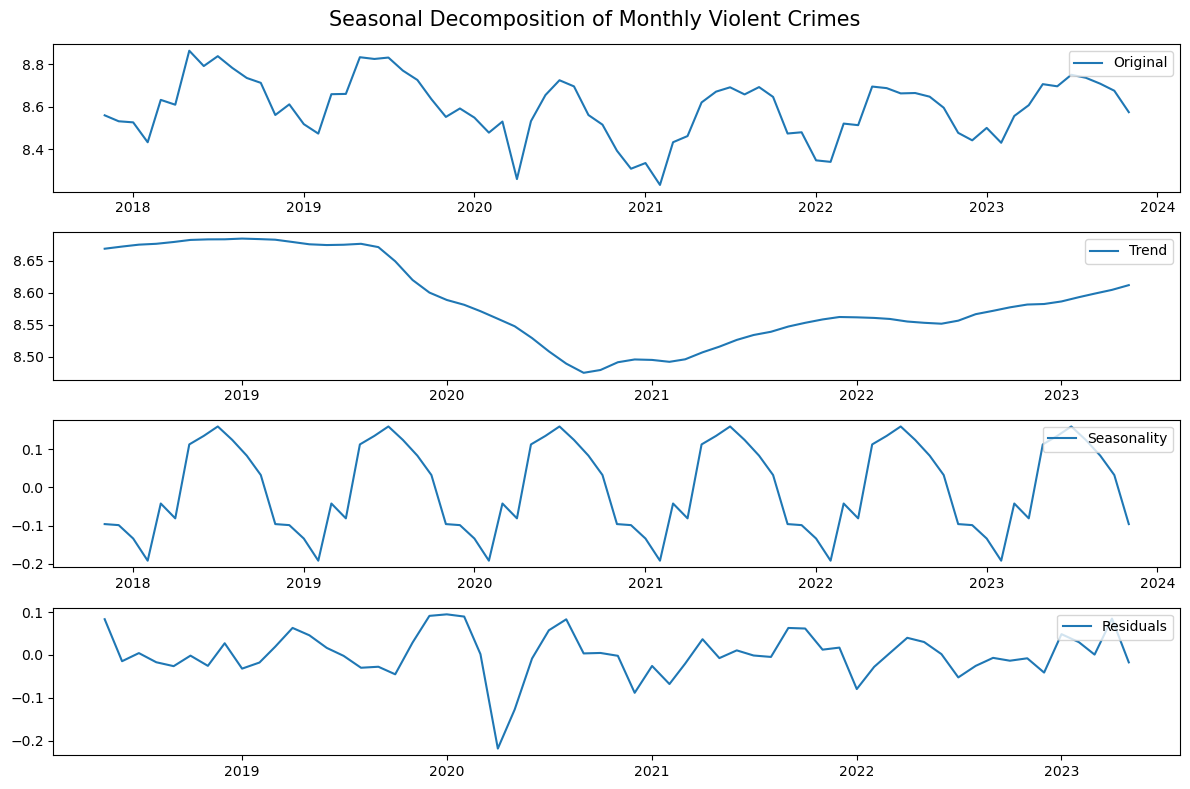

In [ ]:
# Check if there's only one entry per month or if we need to aggregate
entries_per_month = monthly_crime_data.index.value_counts()

# If the maximum count of entries per month is more than 1, we need to aggregate
if entries_per_month.max() > 1:
    # Aggregate by month
    crime_data_csv_monthly = monthly_crime_data['Violent Crimes'].resample('M').sum()
else:
    # No need to aggregate, just isolate the 'Violent Crimes' column
    crime_data_csv_monthly = monthly_crime_data['Violent Crimes']

# Perform log transformation to stabilize the variance
crime_data_csv_monthly_log = np.log(crime_data_csv_monthly)

# Perform seasonal decomposition
decomposition = seasonal_decompose(np.log(monthly_crime_data))

# Plot the seasonal decomposition
plt.figure(figsize=(12, 8))
plt.suptitle('Seasonal Decomposition of Monthly Violent Crimes', size=15)

# Original Data
plt.subplot(411)
plt.plot(crime_data_csv_monthly_log, label='Original')
plt.legend(loc='upper right')

# Trend
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper right')

# Seasonality
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='upper right')

# Residuals
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

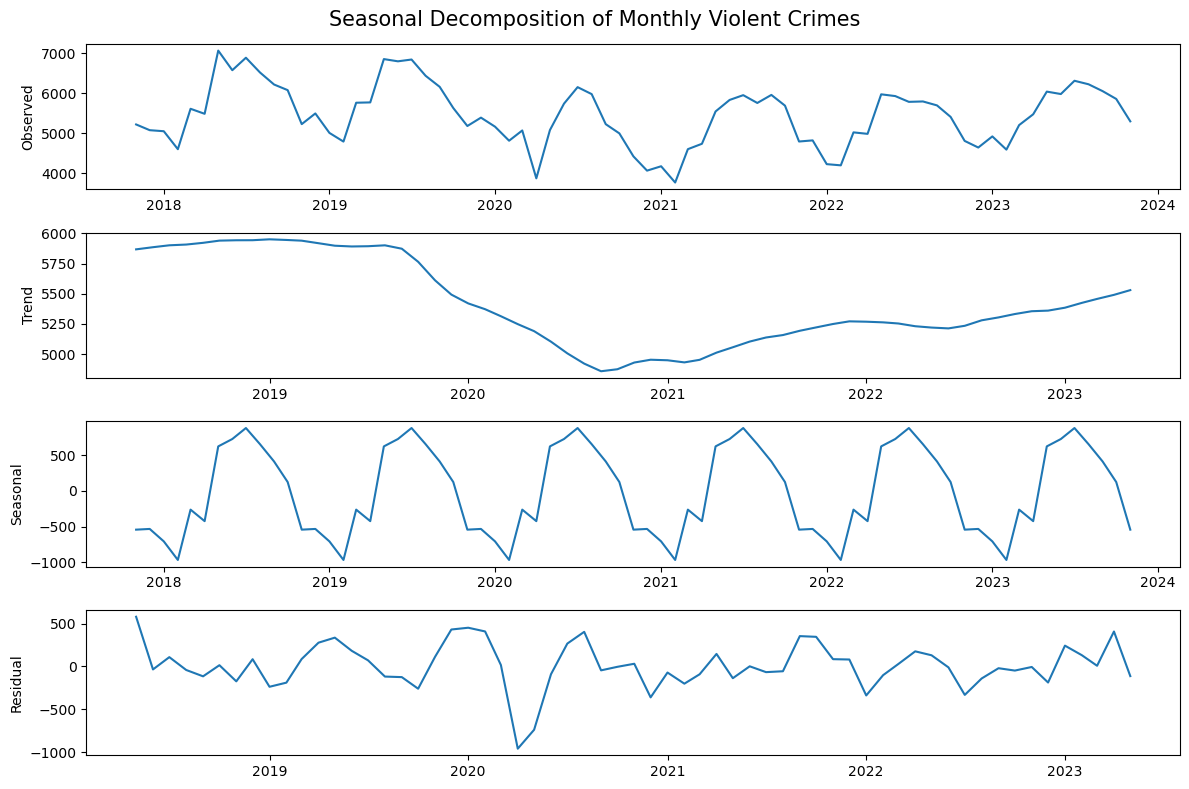

In [ ]:
# Decompose the time series data
decomposition = seasonal_decompose(monthly_crime_data['Violent Crimes'], model='additive', period=12)

# Plot the decomposed time series components
fig, ax = plt.subplots(4, 1, figsize=(12, 8))
plt.suptitle('Seasonal Decomposition of Monthly Violent Crimes', size=15)

# Observed
ax[0].plot(decomposition.observed, label='Original')
ax[0].set_ylabel('Observed')
''
# Trend
ax[1].plot(decomposition.trend)
ax[1].set_ylabel('Trend')

# Seasonal
ax[2].plot(decomposition.seasonal) 
ax[2].set_ylabel('Seasonal')

# Residual - using scatter plot for residuals
ax[3].plot(decomposition.resid.index, decomposition.resid)
ax[3].set_ylabel('Residual')

plt.tight_layout()
plt.show()

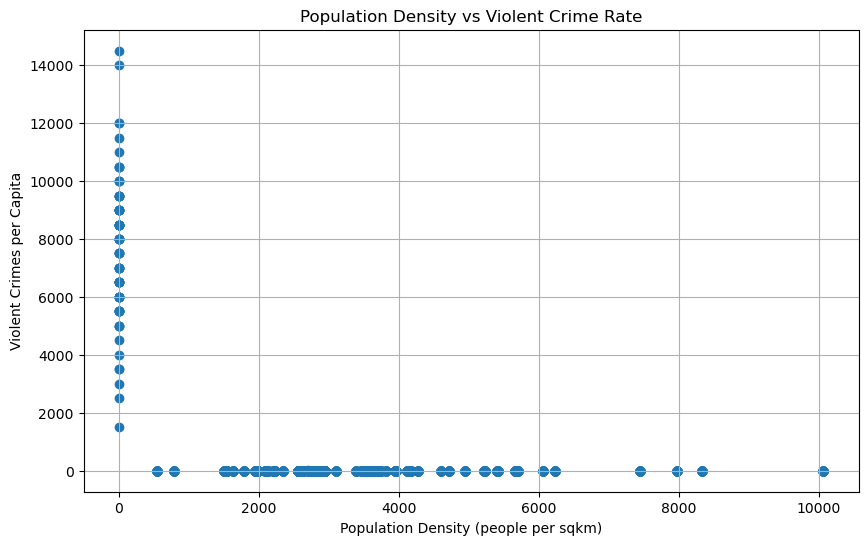

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and has been loaded correctly

# If you need to, aggregate your data by 'Sector' and 'Year' (year extracted from 'Month')
# Here's an example of how you might do that aggregation
df['Year'] = pd.to_datetime(df['Month']).dt.year
annual_data = df.groupby(['Sector', 'Year']).agg({
    'Violent Crimes': 'sum',
     'TOTAL POPULATION': 'mean', # or however you want to handle multiple entries per year
     'Population Density (people/sqkm)': 'mean', # assuming this doesn't change month to month
#     # Other columns as needed
 }).reset_index()

# For plotting, you can use the existing 'Population Density (people/sqkm)' and 'Violent Crimes per Capita'
plt.figure(figsize=(10, 6))
plt.scatter(df['Population Density (people/sqkm)'], df['Violent Crimes per Capita'])
plt.title('Population Density vs Violent Crime Rate')
plt.xlabel('Population Density (people per sqkm)')
plt.ylabel('Violent Crimes per Capita')
plt.grid(True)
plt.show()


In [ ]:
import statsmodels.api as sm

# Assuming 'df' is your DataFrame and it has been preprocessed correctly

# Select your independent variables (X) - including population density and other factors
X = df[['Population Density (people/sqkm)', 'PERCENT_OF_HOUSING_CROWDED', 
        'PERCENT_HOUSEHOLDS_BELOW_POVERTY', 'PERCENT_AGED_16_UNEMPLOYED', 
        'PERCENT_AGED_25_WITHOUT_HIGH_SCHOOL_DIPLOMA', 'PERCENT_AGED_UNDER_18_OR_OVER_64', 
        'PER_CAPITA_INCOME', 'HARDSHIP_INDEX']]

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Select your dependent variable
y = df['Violent Crimes per Capita']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print out the statistics
model_summary = model.summary()
print(model_summary)

                                OLS Regression Results                               
Dep. Variable:     Violent Crimes per Capita   R-squared:                       0.168
Model:                                   OLS   Adj. R-squared:                  0.167
Method:                        Least Squares   F-statistic:                     123.3
Date:                       Mon, 05 Feb 2024   Prob (F-statistic):          9.14e-189
Time:                               07:50:22   Log-Likelihood:                -40133.
No. Observations:                       4891   AIC:                         8.028e+04
Df Residuals:                           4882   BIC:                         8.034e+04
Df Model:                                  8                                         
Covariance Type:                   nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

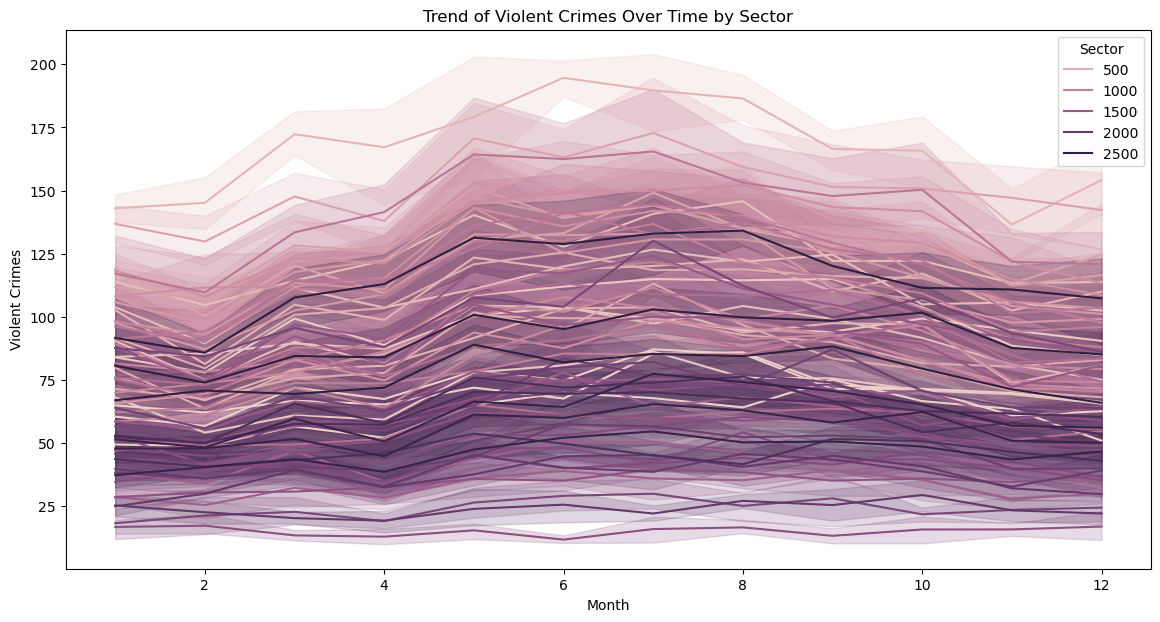

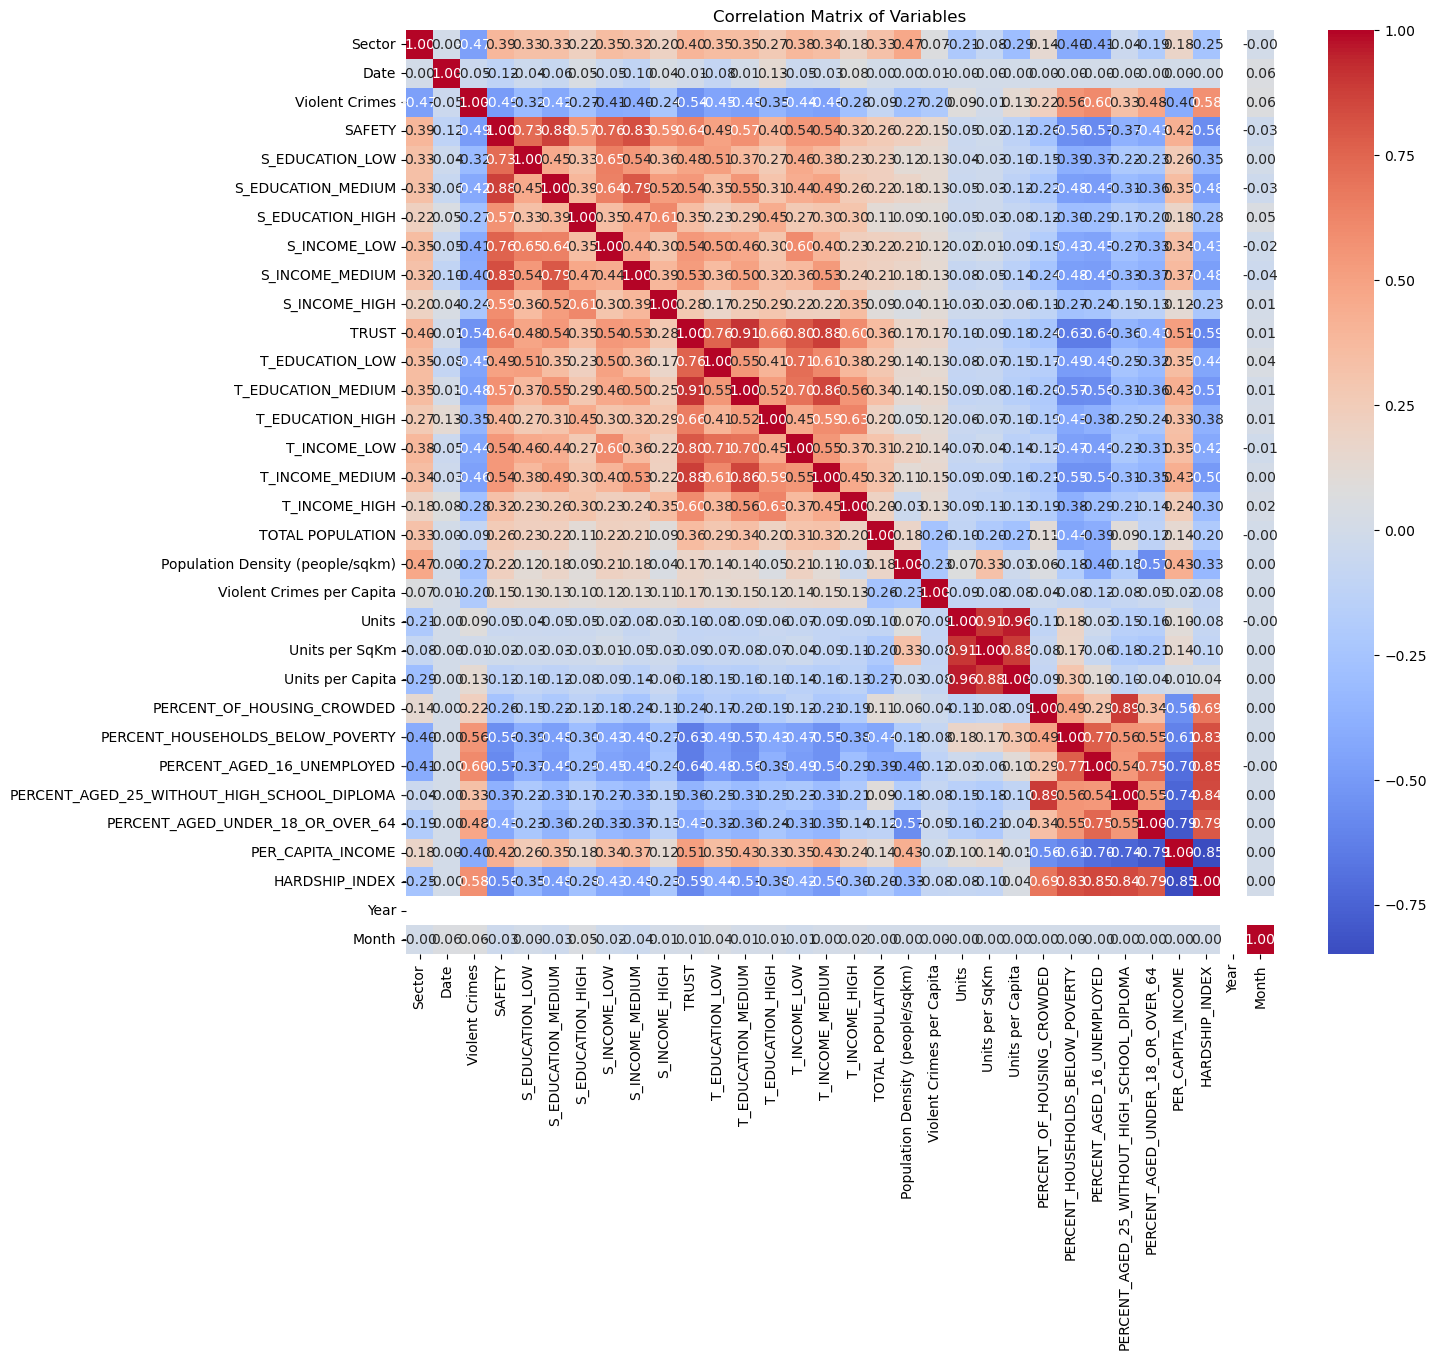

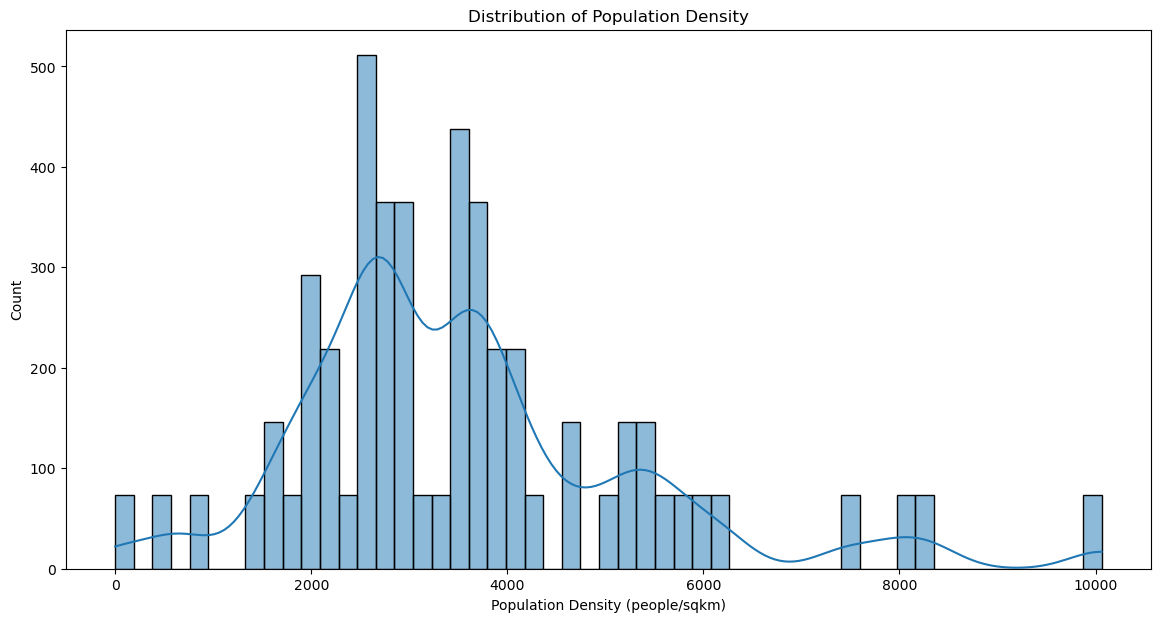

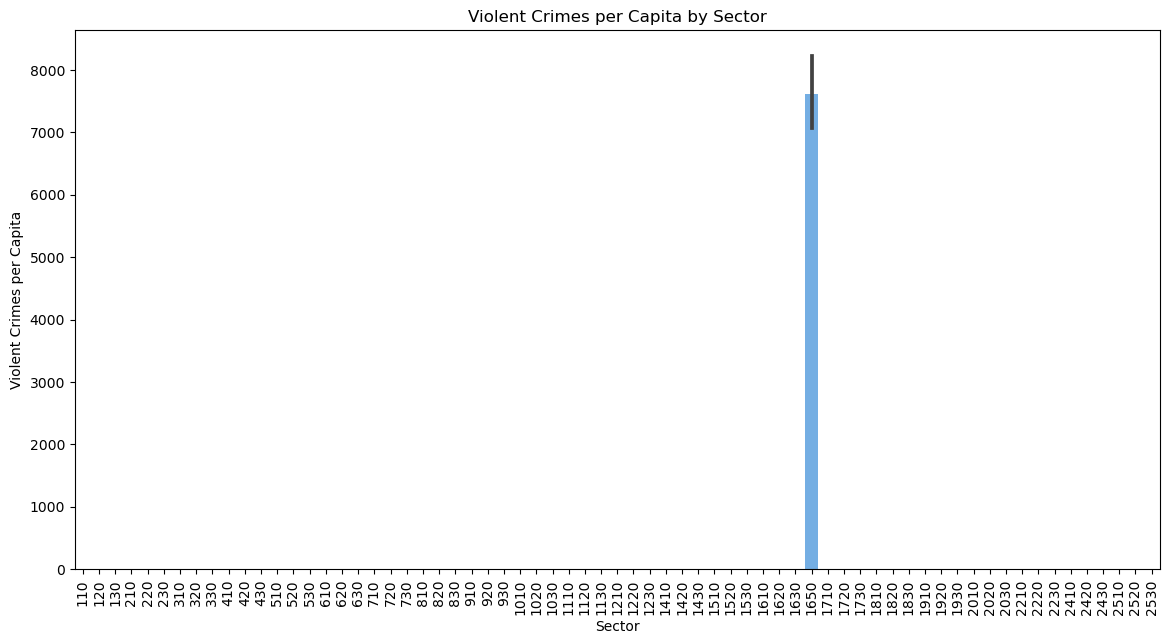

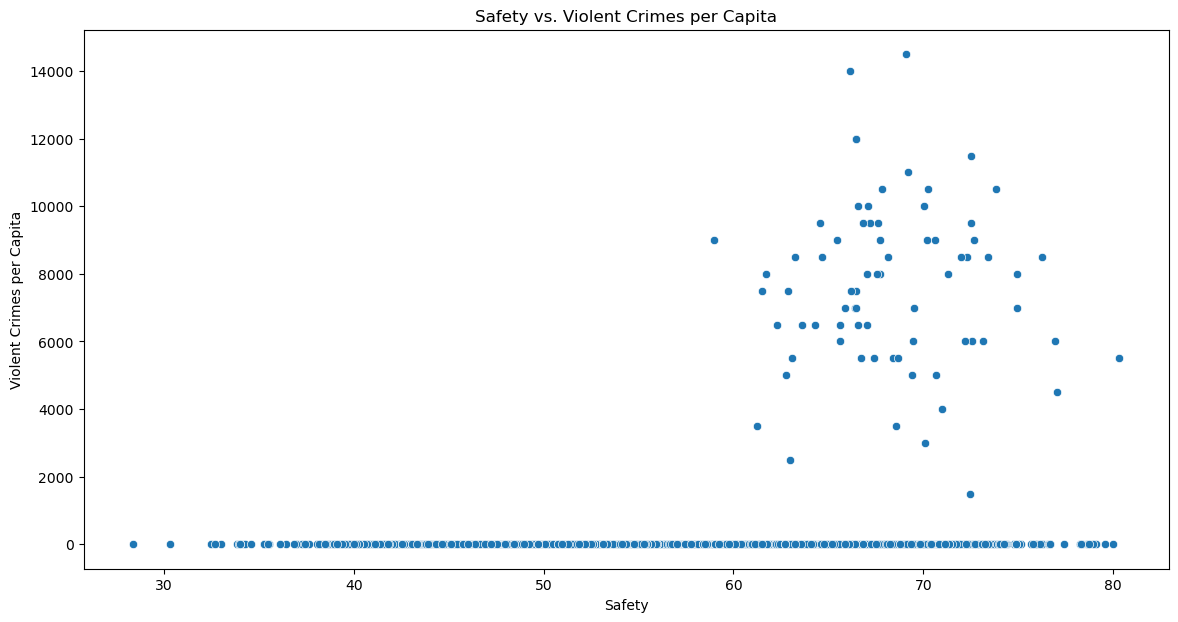

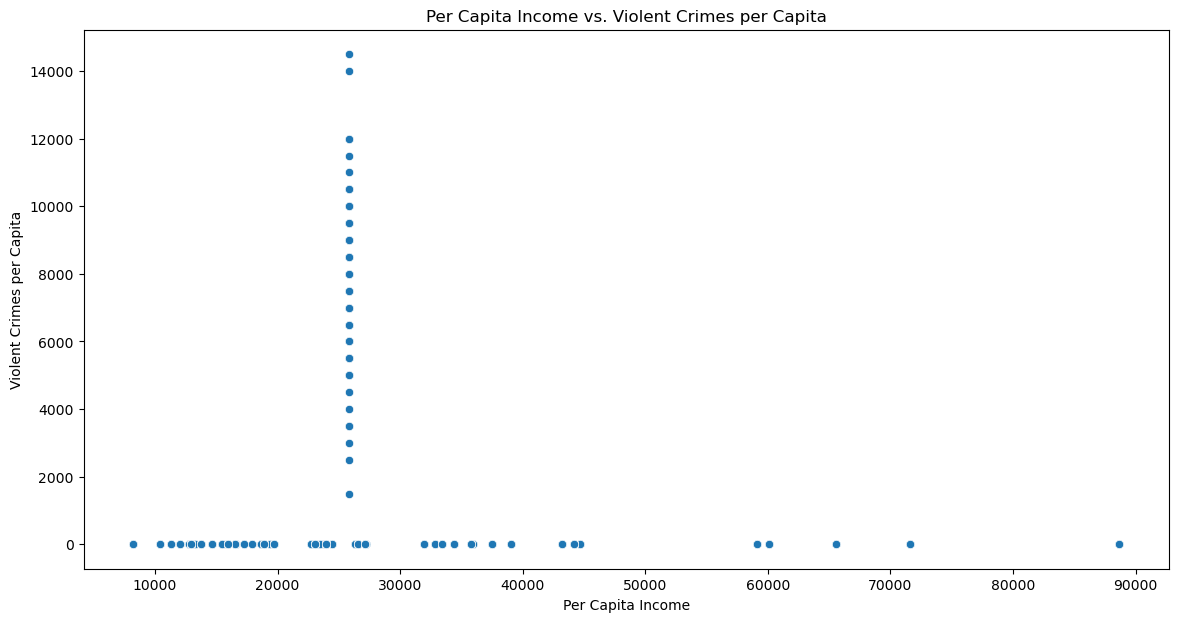

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Trend Analysis
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='Month', y='Violent Crimes', hue='Sector')
plt.title('Trend of Violent Crimes Over Time by Sector')
plt.xlabel('Month')
plt.ylabel('Violent Crimes')
plt.legend(title='Sector')
plt.show()

# Correlation Analysis
correlation_matrix = df.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Variables')
plt.show()

# Distribution Analysis
plt.figure(figsize=(14, 7))
sns.histplot(df['Population Density (people/sqkm)'], kde=True)
plt.title('Distribution of Population Density')
plt.xlabel('Population Density (people/sqkm)')
plt.show()

# Comparative Analysis
plt.figure(figsize=(14, 7))
sns.barplot(data=df, x='Sector', y='Violent Crimes per Capita')
plt.title('Violent Crimes per Capita by Sector')
plt.xlabel('Sector')
plt.ylabel('Violent Crimes per Capita')
plt.xticks(rotation=90)
plt.show()

# Safety and Trust Analysis
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df, x='SAFETY', y='Violent Crimes per Capita')
plt.title('Safety vs. Violent Crimes per Capita')
plt.xlabel('Safety')
plt.ylabel('Violent Crimes per Capita')
plt.show()

# Demographic and Socioeconomic Patterns
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df, x='PER_CAPITA_INCOME', y='Violent Crimes per Capita')
plt.title('Per Capita Income vs. Violent Crimes per Capita')
plt.xlabel('Per Capita Income')
plt.ylabel('Violent Crimes per Capita')
plt.show()

# Note: Replace 'df' with your actual dataframe name and column names with your dataframe's specific column names.


### 

### Descriptive Statistics for Each Sector

In [ ]:
# Group data by sector and calculating descriptive statistics for each sector
sector_grouped = df.groupby('Sector').agg(['mean', 'median', 'std', 'min', 'max'])

# Display the first few rows of the grouped data for an overview
sector_grouped.head()

Date                                                    \
             mean     median                         std        min   
Sector                                                                
110    2020-10-31 2020-11-01 645 days 17:51:47.082607816 2017-11-01   
120    2020-10-31 2020-11-01 645 days 17:51:47.082607600 2017-11-01   
130    2020-10-31 2020-11-01 645 days 17:51:47.082607616 2017-11-01   
210    2020-10-31 2020-11-01 645 days 17:51:47.082607480 2017-11-01   
220    2020-10-31 2020-11-01 645 days 17:51:47.082607728 2017-11-01   

                  Violent Crimes                                SAFETY         \
              max           mean median        std min  max       mean median   
Sector                                                                          
110    2023-11-01      69.739726   72.0  18.139144  30  108  63.066575  65.12   
120    2023-11-01      71.794521   74.0  17.806802  32  108  62.413014  64.44   
130    2023-11-01      60.931507   60.0  15.221813  28   96  60.737945  61.45   
210    2023-11-01      99.219178   99.0  19.189296  60  144  58.052192  57.60   
220    2023-11-01      93.643836   93.0  15.428482  63  126  58.157260  59.13   

                               S_EDUCATION_LOW                           \
             std    min    max            mean median        std    min   
Sector                                                                    
110     9.426694  44.49  78.26       55.397971  58.99  13.934076  16.38   
120     7.363531  45.60  76.59       55.251594  56.93  11.273336  26.69   
130     7.192559  43.72  73.61       57.111449  61.76  14.989525   8.62   
210     5.284590  45.44  69.93       54.430580  55.13   9.250287  35.84   
220     5.672391  40.37  69.26       53.797681  54.40   8.974267  34.72   

              S_EDUCATION_MEDIUM                                  \
          max               mean median        std    min    max   
Sector                                                             
110     79.20          63.376957  64.94  11.590687  36.20  84.75   
120     75.72          60.651594  62.16   8.376708  44.25  78.40   
130     77.61          59.517681  60.18   7.585501  38.53  80.03   
210     76.40          57.560435  57.31   6.319377  44.62  72.74   
220     76.00          59.150580  60.98   7.657516  31.17  73.63   

       S_EDUCATION_HIGH                                 S_INCOME_LOW         \
                   mean median        std    min    max         mean median   
Sector                                                                        
110           64.521159  63.02  11.020392  41.88  84.84    57.972754  58.79   
120           65.816232  66.92   8.614604  43.25  80.79    58.656087  60.00   
130           64.881014  65.08   8.510283  48.86  83.64    57.927391  58.11   
210           63.557101  63.67   9.016345  36.47  85.38    56.462029  55.49   
220           61.370870  61.60   9.462991  28.96  83.50    56.148696  57.32   

                               S_INCOME_MEDIUM                           \
             std    min    max            mean median        std    min   
Sector                                                                    
110     8.922295  24.28  73.39       63.398986  62.71  10.559364  41.30   
120     9.373921  37.67  75.09       62.426667  63.54   8.676288  41.27   
130     9.740889  38.90  75.82       60.542029  62.73  10.581892  25.59   
210     8.401122  39.46  77.88       56.788406  58.06   8.556908  32.21   
220     8.915002  32.94  76.21       57.645217  59.30   8.275902  25.67   

              S_INCOME_HIGH                                      TRUST         \
          max          mean median        std    min    max       mean median   
Sector                                                                          
110     84.92     64.301884  66.75  14.343840  34.29  84.80  71.158767  71.84   
120     82.16     64.097101  65.73  10.246929  39.58  83.89  67.503425  67.46   
130     79

### How does the average unemployment rate in a community correlate with the total count of violent crimes over the same period?

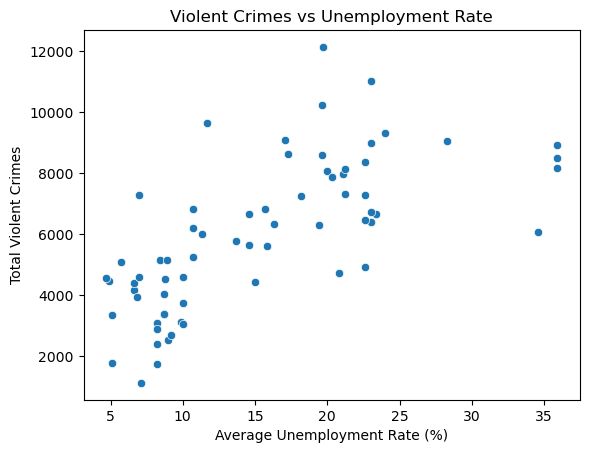

,Violent Crimes,PERCENT_AGED_16_UNEMPLOYED
Violent Crimes,1.000000,0.679673
PERCENT_AGED_16_UNEMPLOYED,0.679673,1.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# As the data might contain multiple entries for the same sector in different months,
# we need to aggregate it to get the total number of violent crimes per sector.
# We'll also calculate the average unemployment rate for each sector.

# Aggregate the data
crime_unemployment_agg = df.groupby('Sector').agg({
    'Violent Crimes': 'sum',
    'PERCENT_AGED_16_UNEMPLOYED': 'mean'
}).reset_index()

# Calculate the Pearson correlation coefficient for these variables
correlation = crime_unemployment_agg[['Violent Crimes', 'PERCENT_AGED_16_UNEMPLOYED']].corr()

# Plot the relationship between unemployment and violent crimes
sns.scatterplot(data=crime_unemployment_agg, x='PERCENT_AGED_16_UNEMPLOYED', y='Violent Crimes')
plt.title('Violent Crimes vs Unemployment Rate')
plt.xlabel('Average Unemployment Rate (%)')
plt.ylabel('Total Violent Crimes')

plt.show()

correlation